# Analytics Module
The Analytics module provides descriptive statistics on content data, evidence data and model evaluations 

In [1]:
# reloads modules automatically before entering the execution of code


%load_ext autoreload
%autoreload 2

# third parties imports
import numpy as np 
import pandas as pd
# -- add new imports here --
import matplotlib.pyplot as plt
from collections import Counter

# local imports
from constants import Constant as C
from loaders import load_ratings
from loaders import load_items

# 1 - Content analytics
Explore and perform descriptive statistics on content data

In [2]:
# -- load the items and display the Dataframe
df_items = load_items()
display(df_items)



,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
...,...,...
162672,Mohenjo Daro (2016),Adventure|Drama|Romance
163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi
163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary


In [3]:
# -- display relevant informations that can be extracted from the dataset
n_movies = len(df_items)
print(f"Number of movies: {n_movies}")
df_items['year'] = df_items['title'].str.extract(r"\((\d{4})\)")
df_items['year'] = pd.to_numeric(df_items['year'], errors='coerce').astype('Int64')
print(df_items)

df_items['year'].dtype
print(f"Year range : from {df_items['year'].min()} to {df_items['year'].max()}")

Number of movies: 9125
                                                     title  \
movieId                                                      
1                                         Toy Story (1995)   
2                                           Jumanji (1995)   
3                                  Grumpier Old Men (1995)   
4                                 Waiting to Exhale (1995)   
5                       Father of the Bride Part II (1995)   
...                                                    ...   
162672                                 Mohenjo Daro (2016)   
163056                                Shin Godzilla (2016)   
163949   The Beatles: Eight Days a Week - The Touring Y...   
164977                            The Gay Desperado (1936)   
164979                               Women of '69, Unboxed   

                                              genres  year  
movieId                                                     
1        Adventure|Animation|Children|Comedy|Fan

# 2 - Evidence analytics
Explore and perform descriptive statistics on evidence data

In [4]:
# -- load the items and display the Dataframe
df_ratings = load_ratings()
display(df_ratings)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [5]:

df_items['genres'] = df_items['genres'].apply(lambda x: x.split("|"))
genre_frequency = Counter(g for genres in df_items['genres'] for g in genres)

print(f"There are {len(genre_frequency)} genres.")

display(genre_frequency)



# -- display relevant informations that can be extracted from the dataset
n_ratings = len(df_ratings)
print(f'Number of ratings : {n_ratings}')

unique_users = len(pd.unique(df_ratings['userId']))
print(f'Number of users : {unique_users}')

unique_movies = len(pd.unique(df_ratings['movieId']))
print(f'Number of movies : {unique_movies}')


ratings_matrix = df_ratings.pivot(index='userId', columns='movieId', values='rating')
display(ratings_matrix)

unique_movies_matrix = len(ratings_matrix.columns)
print(f'Number of movies in the ratings matrix : {unique_movies_matrix}')

joined_df = df_ratings.join(df_items, 'movieId').groupby(['title']).agg({'rating' : ['count'] })
print(joined_df.columns)

print('10 most rated movies : ')
print('')
display(joined_df.sort_values([('rating', 'count')], ascending=False).head(10))

print('10 least rated movies : ')
print('')
display(joined_df.sort_values([('rating', 'count')], ascending=True).head(10))

print('All possible rating values : ')
print('')
rating_values = np.sort(df_ratings['rating'].unique())
for i in rating_values :
    print(i)

print(f"Number of unrated movies: {len(joined_df[joined_df[('rating', 'count')] == 0])}")


There are 20 genres.


Counter({'Drama': 4365,
         'Comedy': 3315,
         'Thriller': 1729,
         'Romance': 1545,
         'Action': 1545,
         'Adventure': 1117,
         'Crime': 1100,
         'Horror': 877,
         'Sci-Fi': 792,
         'Fantasy': 654,
         'Children': 583,
         'Mystery': 543,
         'Documentary': 495,
         'Animation': 447,
         'Musical': 394,
         'War': 367,
         'Western': 168,
         'IMAX': 153,
         'Film-Noir': 133,
         '(no genres listed)': 18})

Number of ratings : 100004
Number of users : 671
Number of movies : 9066


movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Number of movies in the ratings matrix : 9066
MultiIndex([('rating', 'count')],
           )
10 most rated movies : 



,rating
,count
title,
Forrest Gump (1994),341
Pulp Fiction (1994),324
"Shawshank Redemption, The (1994)",311
"Silence of the Lambs, The (1991)",304
Star Wars: Episode IV - A New Hope (1977),291
Jurassic Park (1993),274
"Matrix, The (1999)",259
Toy Story (1995),247


10 least rated movies : 



,rating
,count
title,
Zombeavers (2014),1
Zombie Holocaust (a.k.a. Doctor Butcher M.D.) (Zombi Holocaust) (1980),1
Youth of the Beast (Yaju no seishun) (1963),1
Yu-Gi-Oh! (2004),1
Z Channel: A Magnificent Obsession (2004),1
12:08 East of Bucharest (A fost sau n-a fost?) (2006),1
Zeitgeist: The Movie (2007),1
Zelary (2003),1


All possible rating values : 

0.5
1.0
1.5
2.0
2.5
3.0
3.5
4.0
4.5
5.0
Number of unrated movies: 0


# 3 - Long-tail property

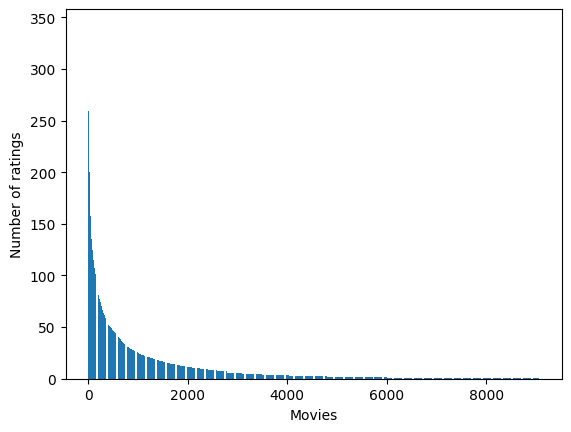

In [17]:
X = np.linspace(0, len(joined_df), len(joined_df))
Y = joined_df.sort_values([('rating', 'count')], ascending=False)[('rating', 'count')].to_numpy() #[('rating', 'count')]

fig, ax = plt.subplots()
ax.bar(X, Y)
plt.xlabel('Movies')
plt.ylabel('Number of ratings')
plt.show()

# 4 - Ratings matrix sparsity

movieId,1,2,3,4,5,6,7,8,9,10,...,98,99,100,101,102,103,104,105,107,108
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


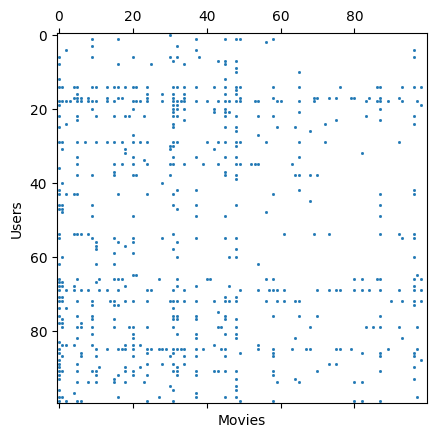

In [18]:
lim_mat = ratings_matrix.iloc[:100, :100]
display(lim_mat)

plt.spy(lim_mat, markersize=1)
plt.xlabel('Movies')
plt.ylabel('Users')
plt.show()